# Design of Experiment (DOE) and Supervised Learning

In [1]:
import pandas as pd
import os

csv_path = os.path.join('..', 'dataset', 'dataset_ur3_cobotops.csv')
data = pd.read_csv(csv_path)

## 1. Exploratory Data Analysis

In [2]:
# #Basic dataset information
print("Dataset Shape:", data.shape)
print("\nColumn Names:")
print(data.columns.tolist())
print("\nData Types:")
print(data.dtypes)
print("\nFirst 5 rows:")
data.head()

Dataset Shape: (7409, 24)

Column Names:
['Num', 'Timestamp', 'Current_J0', 'Temperature_T0', 'Current_J1', 'Temperature_J1', 'Current_J2', 'Temperature_J2', 'Current_J3', 'Temperature_J3', 'Current_J4', 'Temperature_J4', 'Current_J5', 'Temperature_J5', 'Speed_J0', 'Speed_J1', 'Speed_J2', 'Speed_J3', 'Speed_J4', 'Speed_J5', 'Tool_current', 'cycle ', 'Robot_ProtectiveStop', 'grip_lost']

Data Types:
Num                       int64
Timestamp                object
Current_J0              float64
Temperature_T0          float64
Current_J1              float64
Temperature_J1          float64
Current_J2              float64
Temperature_J2          float64
Current_J3              float64
Temperature_J3          float64
Current_J4              float64
Temperature_J4          float64
Current_J5              float64
Temperature_J5          float64
Speed_J0                float64
Speed_J1                float64
Speed_J2                float64
Speed_J3                float64
Speed_J4              

,Num,Timestamp,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,...,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
0,1,2022-10-26T08:17:21.847Z,0.109628,27.875,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,...,2.955651e-01,-0.000490,0.001310,-0.132836,-0.007479,-0.152962,0.082732,1,0.0,False
1,2,2022-10-26T08:17:22.852Z,0.595605,27.875,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,...,-7.391485e-30,-0.000304,0.002185,0.001668,-0.000767,0.000417,0.505895,1,0.0,False
2,3,2022-10-26T08:17:23.857Z,-0.229474,27.875,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,...,1.369386e-01,0.007795,-2.535874,0.379867,0.000455,-0.496856,0.079420,1,0.0,False
3,4,2022-10-26T08:17:24.863Z,0.065053,27.875,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,...,-9.030032e-02,-0.004911,-0.009096,-0.384196,0.018411,0.425559,0.083325,1,0.0,False
4,5,2022-10-26T08:17:25.877Z,0.884140,27.875,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,...,1.268088e-01,0.005567,0.001138,-0.353284,0.014994,0.180989,0.086379,1,0.0,False


### 1.2 Missing Values

In [3]:
print("\nMissing Values Description:")
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_df = pd.DataFrame({
    'Column': data.columns,
    'Missing Count': data.isnull().sum(),
    'Missing Percentage': missing_percentage
})
print(missing_df)


Missing Values Description:
                                    Column  Missing Count  Missing Percentage
Num                                    Num              0            0.000000
Timestamp                        Timestamp              0            0.000000
Current_J0                      Current_J0             46            0.620867
Temperature_T0              Temperature_T0             54            0.728843
Current_J1                      Current_J1             54            0.728843
Temperature_J1              Temperature_J1             54            0.728843
Current_J2                      Current_J2             54            0.728843
Temperature_J2              Temperature_J2             54            0.728843
Current_J3                      Current_J3             54            0.728843
Temperature_J3              Temperature_J3             54            0.728843
Current_J4                      Current_J4             54            0.728843
Temperature_J4              Tempera

### 1.3 Data Types

In [4]:
# Classify features into numerical and categorical
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Features:", len(numerical_features))
print(numerical_features)
print("\nCategorical Features:", len(categorical_features))
print(categorical_features)

Numerical Features: 22
['Num', 'Current_J0', 'Temperature_T0', 'Current_J1', 'Temperature_J1', 'Current_J2', 'Temperature_J2', 'Current_J3', 'Temperature_J3', 'Current_J4', 'Temperature_J4', 'Current_J5', 'Temperature_J5', 'Speed_J0', 'Speed_J1', 'Speed_J2', 'Speed_J3', 'Speed_J4', 'Speed_J5', 'Tool_current', 'cycle ', 'Robot_ProtectiveStop']

Categorical Features: 1
['Timestamp']


### 1.4 Numerical Features - Descriptive Statistics

In [5]:
if len(numerical_features) > 0:
    print("Numerical Features Statistics Description:")
    numerical_stats = data[numerical_features].describe()
    print(numerical_stats)

    print("\nAdditional Statistics Information:")
    for col in numerical_features:
        print(f"\n{col}:")
        print(f"  Skewness: {data[col].skew():.4f}")
        print(f"  Kurtosis: {data[col].kurtosis():.4f}")
        print(f"  Variance: {data[col].var():.4f}")
else:
    print("No numerical features found in the dataset.")

Numerical Features Statistics Description:
               Num   Current_J0  Temperature_T0   Current_J1  Temperature_J1  \
count  7409.000000  7363.000000     7355.000000  7355.000000     7355.000000   
mean   3705.000000    -0.048934       34.906781    -2.297936       37.659636   
std    2138.938405     0.829395        2.762057     0.800450        3.247315   
min       1.000000    -6.247756       27.812500    -5.808734       29.312500   
25%    1853.000000    -0.195026       33.000000    -2.664919       35.375000   
50%    3705.000000    -0.080830       36.500000    -2.236342       39.687500   
75%    5557.000000     0.095959       37.062500    -1.778334       40.125000   
max    7409.000000     6.806938       37.250000     1.083596       40.500000   

        Current_J2  Temperature_J2   Current_J3  Temperature_J3   Current_J4  \
count  7355.000000     7355.000000  7355.000000     7355.000000  7355.000000   
mean     -1.199381       38.064064    -0.605312       40.936999    -0.022968

### 1.5 Categorical Features

In [6]:
# Analysis of categorical features
if len(categorical_features) > 0:
    print("Categorical Features:")
    for col in categorical_features:
        print(f"\n{col}:")
        print(f"  Unique values count: {data[col].nunique()}")
        print(f"  Unique values: {data[col].unique()}")
        print(f"  Value counts:")
        print(data[col].value_counts())
        print(f"  Most frequent: {data[col].mode().iloc[0]} ({data[col].value_counts().iloc[0]} times)")
else:
    print("No categorical features found in the dataset.")

Categorical Features:

Timestamp:
  Unique values count: 7409
  Unique values: ['2022-10-26T08:17:21.847Z' '2022-10-26T08:17:22.852Z'
 '2022-10-26T08:17:23.857Z' ... '2022-10-26T15:36:04.571Z'
 '2022-10-26T15:36:05.572Z' '2022-10-26T15:36:06.580Z']
  Value counts:
Timestamp
2022-10-26T15:36:06.580Z    1
2022-10-26T15:35:50.472Z    1
2022-10-26T15:35:49.468Z    1
2022-10-26T15:35:48.467Z    1
2022-10-26T15:35:47.463Z    1
                           ..
2022-10-26T08:17:26.885Z    1
2022-10-26T08:17:25.877Z    1
2022-10-26T08:17:24.863Z    1
2022-10-26T08:17:23.857Z    1
2022-10-26T08:17:22.852Z    1
Name: count, Length: 7409, dtype: int64
  Most frequent: "2022-10-26T08:20:35.838Z" (1 times)


### 1.6 Data Visualization Setup

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
print('Visualization libraries imported successfully!')

Visualization libraries imported successfully!


### 1.7 Distribution Analysis - Numerical Features

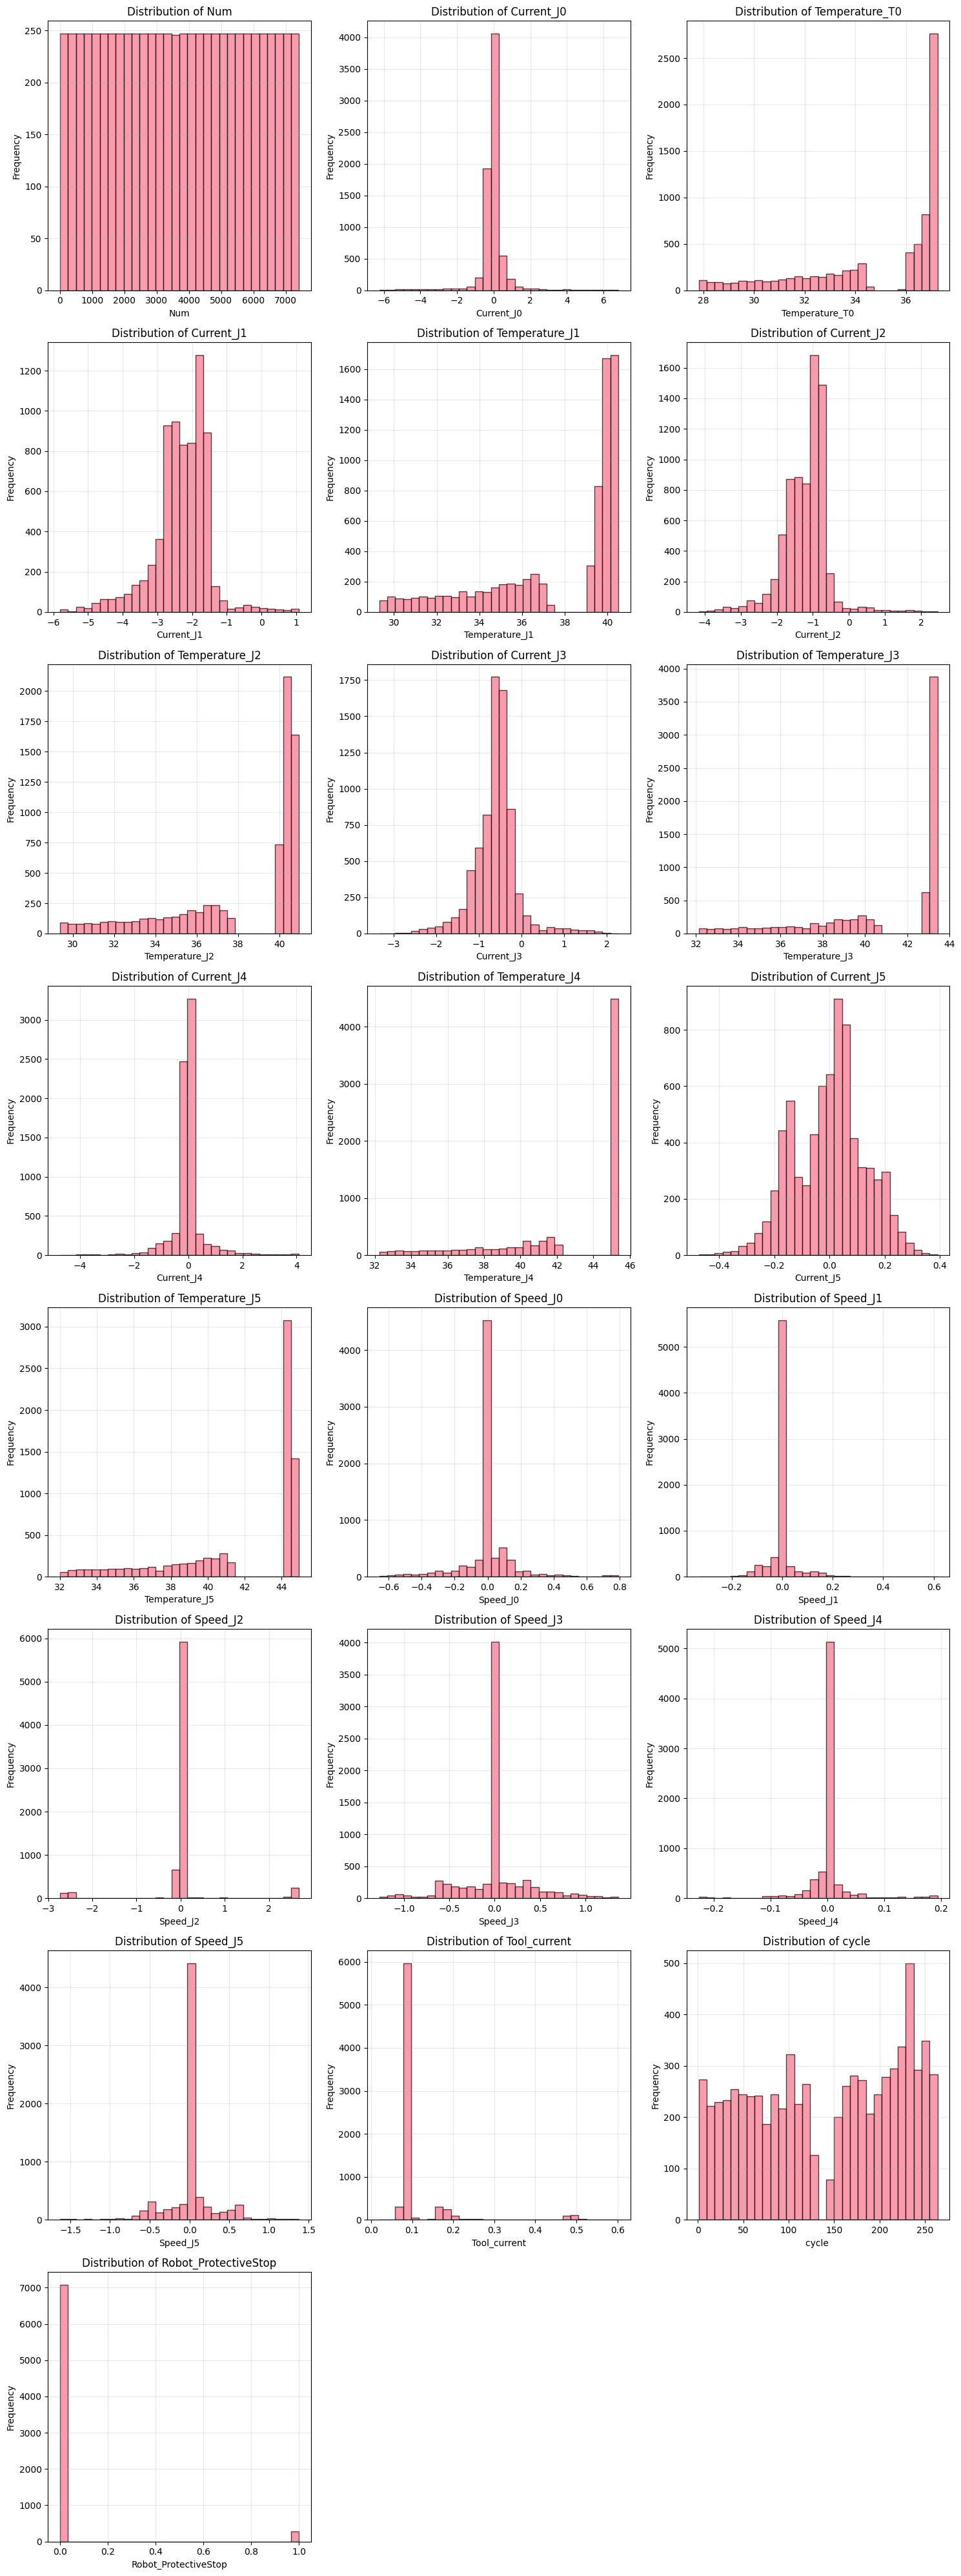

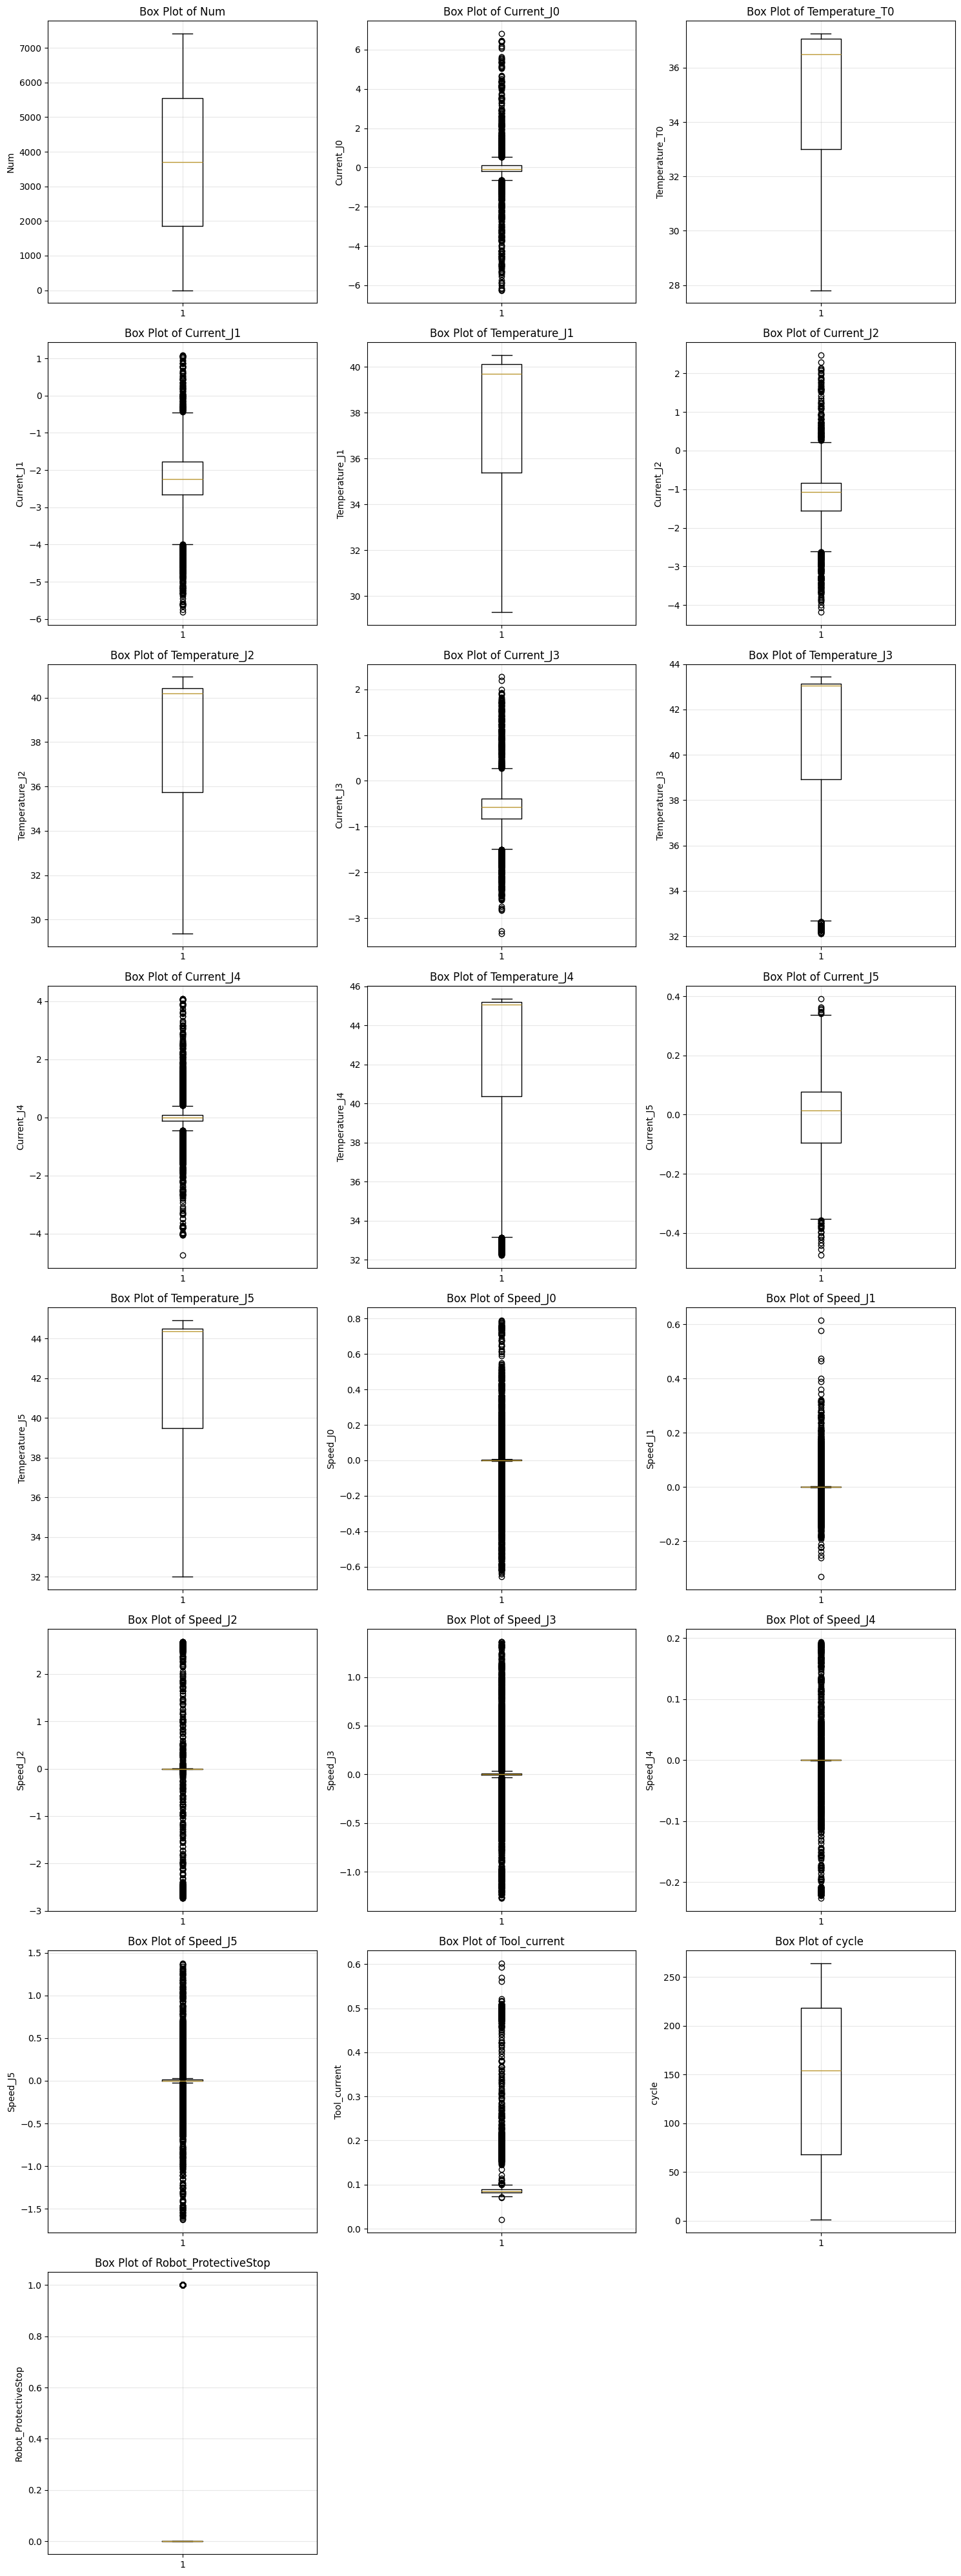

In [ ]:
if len(numerical_features) > 0:
    # Calculate number of rows needed
    n_cols = 3
    n_rows = (len(numerical_features) + n_cols - 1) // n_cols
    
    # Histograms
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.flatten()
    
    for i, col in enumerate(numerical_features):
        axes[i].hist(data[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True, alpha=0.3)
    
    # Remove empty subplots
    for i in range(len(numerical_features), len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()
    
    # Box plots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.flatten()
    
    for i, col in enumerate(numerical_features):
        axes[i].boxplot(data[col].dropna())
        axes[i].set_title(f'Box Plot of {col}')
        axes[i].set_ylabel(col)
        axes[i].grid(True, alpha=0.3)
    
    # Remove empty subplots
    for i in range(len(numerical_features), len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()
else:
    print("No numerical features to plot.")

### 1.8 Distribution Analysis - Categorical Features

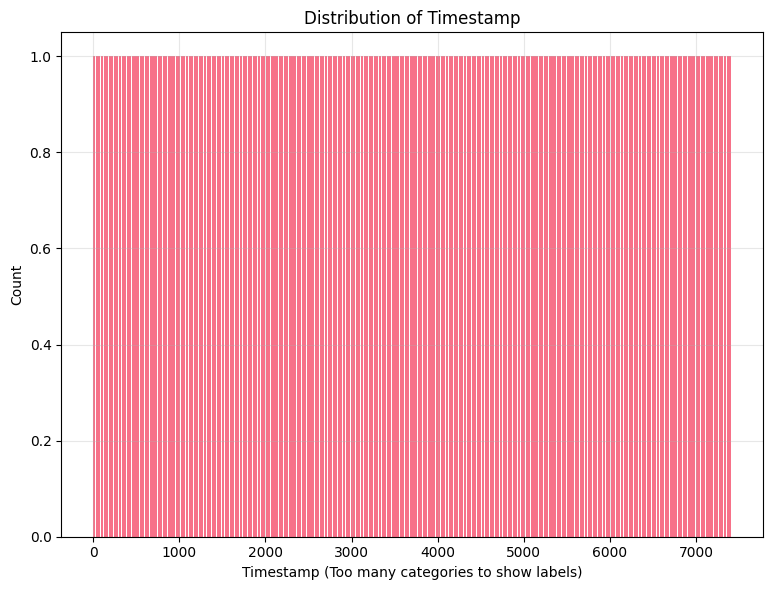

In [9]:
# Distribution plots for categorical features
if len(categorical_features) > 0:
    n_cols = 2
    n_rows = (len(categorical_features) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.flatten()
    
    for i, col in enumerate(categorical_features):
        value_counts = data[col].value_counts()
        axes[i].bar(range(len(value_counts)), value_counts.values)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel('Categories')
        axes[i].set_ylabel('Count')
        
        # Set x-axis labels
        if len(value_counts) <= 10:  # Only show labels if not too many categories
            axes[i].set_xticks(range(len(value_counts)))
            axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')
        else:
            axes[i].set_xlabel(f'{col} (Too many categories to show labels)')
        
        axes[i].grid(True, alpha=0.3)
    
    # Remove empty subplots
    for i in range(len(categorical_features), len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()
else:
    print("No categorical features to plot.")

### 1.9 Outlier Detection

In [10]:
def detect_outliers_iqr(df, column):
    """Detect outliers using IQR method"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

def detect_outliers_zscore(df, column, threshold=3):
    """Detect outliers using Z-score method"""
    col_data = df[column]
    non_null = col_data.dropna()
    z_scores = np.abs(stats.zscore(non_null))
    outlier_mask = (z_scores > threshold)
    outliers = df.loc[non_null.index[outlier_mask]]
    return outliers

if len(numerical_features) > 0:
    print("OUTLIER DETECTION RESULTS")
    print("=" * 50)
    
    for col in numerical_features:
        print(f"\n{col}:")
        print("-" * 30)
        
        # IQR method
        outliers_iqr, lower, upper = detect_outliers_iqr(data, col)
        print(f"IQR Method:")
        print(f"  Bounds: [{lower:.4f}, {upper:.4f}]")
        print(f"  Outliers count: {len(outliers_iqr)}")
        print(f"  Outliers percentage: {len(outliers_iqr)/len(data)*100:.2f}%")
        
        # Z-score method
        outliers_zscore = detect_outliers_zscore(data, col)
        print(f"Z-score Method (threshold=3):")
        print(f"  Outliers count: {len(outliers_zscore)}")
        print(f"  Outliers percentage: {len(outliers_zscore)/len(data)*100:.2f}%")
else:
    print("No numerical features for outlier detection.")

OUTLIER DETECTION RESULTS

Num:
------------------------------
IQR Method:
  Bounds: [-3703.0000, 11113.0000]
  Outliers count: 0
  Outliers percentage: 0.00%
Z-score Method (threshold=3):
  Outliers count: 0
  Outliers percentage: 0.00%

Current_J0:
------------------------------
IQR Method:
  Bounds: [-0.6315, 0.5324]
  Outliers count: 967
  Outliers percentage: 13.05%
Z-score Method (threshold=3):
  Outliers count: 209
  Outliers percentage: 2.82%

Temperature_T0:
------------------------------
IQR Method:
  Bounds: [26.9062, 43.1562]
  Outliers count: 0
  Outliers percentage: 0.00%
Z-score Method (threshold=3):
  Outliers count: 0
  Outliers percentage: 0.00%

Current_J1:
------------------------------
IQR Method:
  Bounds: [-3.9948, -0.4485]
  Outliers count: 412
  Outliers percentage: 5.56%
Z-score Method (threshold=3):
  Outliers count: 154
  Outliers percentage: 2.08%

Temperature_J1:
------------------------------
IQR Method:
  Bounds: [28.2500, 47.2500]
  Outliers count: 0
  

### 1.10 Correlation Analysis

Correlation Matrix:
                           Num  Current_J0  Temperature_T0  Current_J1  \
Num                   1.000000   -0.007812        0.900373   -0.018240   
Current_J0           -0.007812    1.000000       -0.009314    0.022532   
Temperature_T0        0.900373   -0.009314        1.000000   -0.023205   
Current_J1           -0.018240    0.022532       -0.023205    1.000000   
Temperature_J1        0.895731   -0.009484        0.999462   -0.023018   
Current_J2           -0.012321    0.058976       -0.019163    0.665123   
Temperature_J2        0.887082   -0.009825        0.998795   -0.022582   
Current_J3           -0.002413   -0.314995       -0.006077    0.389860   
Temperature_J3        0.869505   -0.009981        0.996209   -0.022531   
Current_J4            0.006753   -0.758236        0.010335   -0.109582   
Temperature_J4        0.855720   -0.009885        0.993953   -0.023206   
Current_J5            0.016469    0.015226       -0.000080   -0.096966   
Temperature_J5    

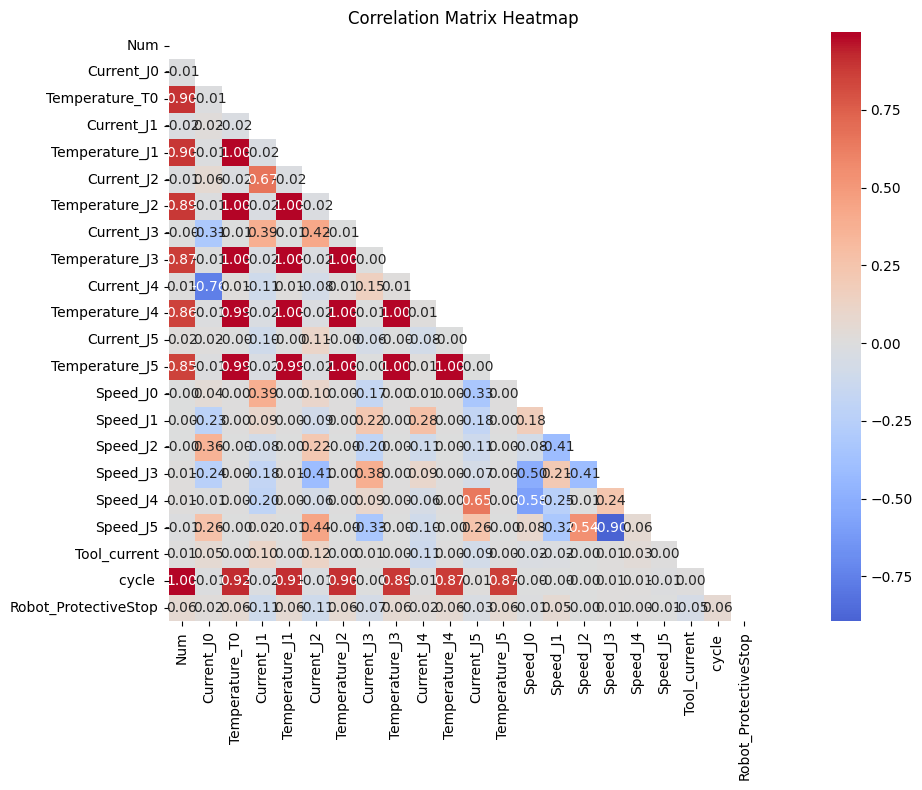


Highly Correlated Feature Pairs (|correlation| > 0.7):
  Num - Temperature_T0: 0.900
  Num - Temperature_J1: 0.896
  Num - Temperature_J2: 0.887
  Num - Temperature_J3: 0.870
  Num - Temperature_J4: 0.856
  Num - Temperature_J5: 0.852
  Num - cycle : 0.995
  Current_J0 - Current_J4: -0.758
  Temperature_T0 - Temperature_J1: 0.999
  Temperature_T0 - Temperature_J2: 0.999
  Temperature_T0 - Temperature_J3: 0.996
  Temperature_T0 - Temperature_J4: 0.994
  Temperature_T0 - Temperature_J5: 0.993
  Temperature_T0 - cycle : 0.919
  Temperature_J1 - Temperature_J2: 1.000
  Temperature_J1 - Temperature_J3: 0.998
  Temperature_J1 - Temperature_J4: 0.996
  Temperature_J1 - Temperature_J5: 0.995
  Temperature_J1 - cycle : 0.913
  Temperature_J2 - Temperature_J3: 0.999
  Temperature_J2 - Temperature_J4: 0.997
  Temperature_J2 - Temperature_J5: 0.997
  Temperature_J2 - cycle : 0.904
  Temperature_J3 - Temperature_J4: 0.999
  Temperature_J3 - Temperature_J5: 0.998
  Temperature_J3 - cycle : 0.887
  

In [ ]:
# Correlation analysis for numerical features
if len(numerical_features) >= 2:
    # Calculate correlation matrix
    correlation_matrix = data[numerical_features].corr()
    
    print("Correlation Matrix:")
    print(correlation_matrix)
    
    # Visualize correlation matrix
    plt.figure(figsize=(12, 8))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, 
                mask=mask,
                annot=True, 
                cmap='coolwarm', 
                center=0,
                square=True,
                fmt='.2f')
    plt.title('Correlation Matrix Heatmap')
    plt.tight_layout()
    plt.show()
    
    # Find highly correlated pairs
    print("\nHighly Correlated Feature Pairs (|correlation| > 0.7):")
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.7:
                high_corr_pairs.append((correlation_matrix.columns[i], 
                                      correlation_matrix.columns[j], 
                                      corr_value))
    
    if high_corr_pairs:
        for feat1, feat2, corr in high_corr_pairs:
            print(f"  {feat1} - {feat2}: {corr:.3f}")
    else:
        print("  No highly correlated pairs found.")
        
elif len(numerical_features) == 1:
    print(f"Only one numerical feature ({numerical_features[0]}) found. Cannot perform correlation analysis.")
else:
    print("No numerical features found for correlation analysis.")